In [4]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv(r'C:\Users\besha\OneDrive\Desktop\ODC\diabetes\Diabetes-Classifier\diabetes.csv')

In [6]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
data.shape

(768, 9)

In [10]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [12]:
data['Pregnancies'].value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
17      1
15      1
Name: count, dtype: int64

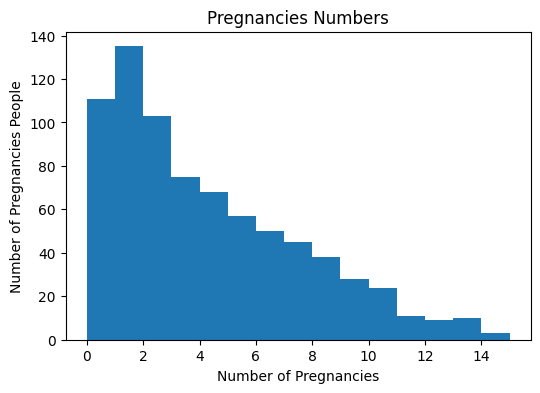

In [13]:
number_of_Pregnancies = [i for i in range(0 , 16)]
plt.figure(figsize=(6,4))
plt.hist(data['Pregnancies'], number_of_Pregnancies)
plt.title('Pregnancies Numbers')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Number of Pregnancies People')
plt.show()

<Axes: >

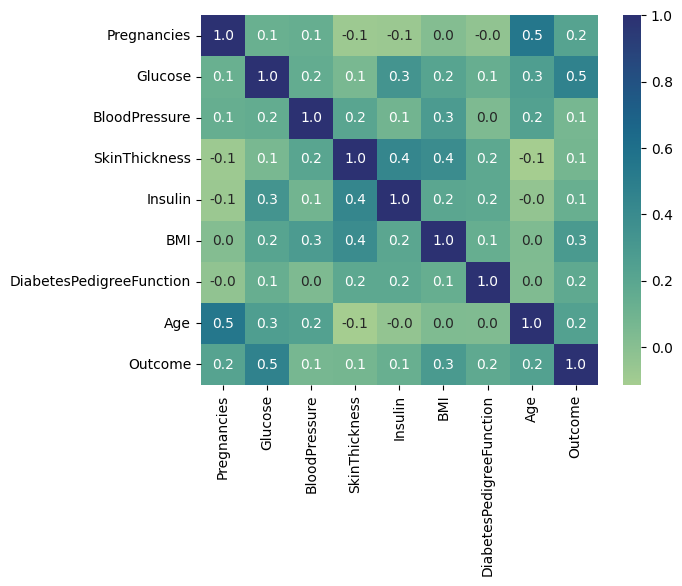

In [14]:
corr = data.corr()

sns.heatmap(corr , annot= True ,fmt=".1f" , cmap="crest")


In [15]:
data['BMI_Age'] = data['BMI'] * data['Age']  # You can experiment with different combinations

<Axes: >

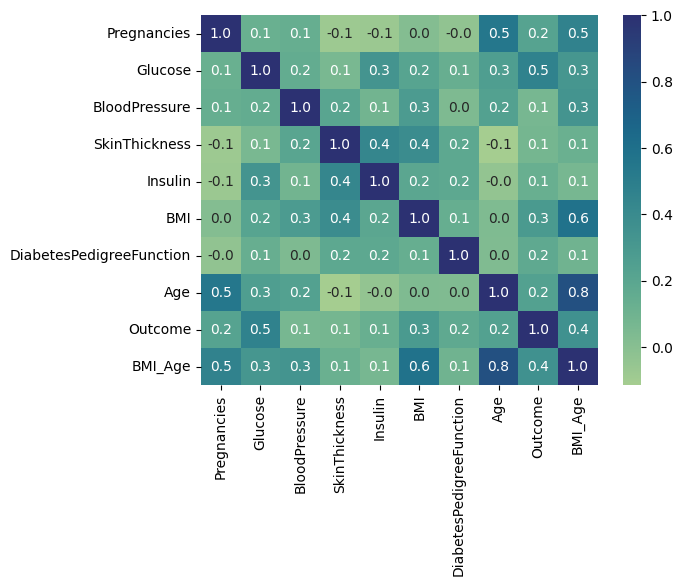

In [16]:
corr = data.corr()
sns.heatmap(corr , annot= True ,fmt=".1f" , cmap="crest")


In [17]:
X = data[['Glucose' , 'BMI_Age']]
y = data['Outcome']

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

In [19]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

In [20]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
# X_train_scaled = scaler.fit_transform(y_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
lr = LogisticRegression()

lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[79 20]
 [22 33]]
              precision    recall  f1-score   support

           0       0.78      0.80      0.79        99
           1       0.62      0.60      0.61        55

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



In [22]:
# from imblearn.under_sampling import ClusterCentroids

# # Initialize the ClusterCentroids undersampler
# cc = ClusterCentroids(random_state=42)

# # Fit and resample the training data
# X_train_resampled, y_train_resampled = cc.fit_resample(X_train_scaled, y_train)

# # Check the class distribution after undersampling
# from collections import Counter
# print("Class distribution after Cluster Centroids undersampling:", Counter(y_train_resampled))


In [23]:
# from sklearn.metrics import classification_report

# # Fit the model with the resampled training data
# lr = LogisticRegression()
# lr.fit(X_train_resampled, y_train_resampled)

# # Make predictions on the test data
# y_pred = lr.predict(X_test_scaled)

# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))

In [24]:
knn = KNeighborsClassifier(n_neighbors=3)

lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[79 20]
 [22 33]]
              precision    recall  f1-score   support

           0       0.78      0.80      0.79        99
           1       0.62      0.60      0.61        55

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



In [25]:
model = XGBClassifier()

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[77 22]
 [27 28]]
              precision    recall  f1-score   support

           0       0.74      0.78      0.76        99
           1       0.56      0.51      0.53        55

    accuracy                           0.68       154
   macro avg       0.65      0.64      0.65       154
weighted avg       0.68      0.68      0.68       154



In [26]:
model=RandomForestClassifier()

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[76 23]
 [24 31]]
              precision    recall  f1-score   support

           0       0.76      0.77      0.76        99
           1       0.57      0.56      0.57        55

    accuracy                           0.69       154
   macro avg       0.67      0.67      0.67       154
weighted avg       0.69      0.69      0.69       154



In [27]:
model = AdaBoostClassifier()

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[81 18]
 [23 32]]
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        99
           1       0.64      0.58      0.61        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



C:\Users\besha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [28]:
model = SVC()

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[82 17]
 [22 33]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        99
           1       0.66      0.60      0.63        55

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.74      0.75      0.74       154



In [29]:
import pickle as pkl 

with open('model.pkl', 'wb') as f:
    pkl.dump(model, f)

print("Model saved successfully!")

Model saved successfully!
